In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
% matplotlib inline

In [2]:
%ls

French Embassy Hackathon - Concept Note_Higher Education.pdf
Online resources Hackathon.xlsx
PE_USA.xls
Untitled.ipynb
VISA.xlsx
readme.md


In [294]:
df = pd.read_excel('VISA.xlsx', skiprows=[0,1], encoding='utf-8')


In [295]:
df.head()

,Sexe,DoB,Nationality,"Type de dossier (accepted = pre consulaire, not accepted yet = candidature)",Study level,Assigned Consulat,Individual mobilty = acceptation papier / mobility exchange = echange,Host University in France,Study level goal,2nd study Projet,...,payment,price,registration payment date,positive avis SCAC,negative avis SCAC,electronic admission accepted,electronic admission denied,consulat reception file,file reception date by consulat,Visa accepted or denied
0,Féminin,20/11/1995,Etats-Unis,Pré-consulaire,NaN,Consulat Général de France à Boston,Echange,"Université Paris Diderot - UFR Lettres, arts e...",Bac +3,NaN,...,Validé,180.0,09/08/2016 20:46,0,0,NaN,NaN,non,NaN,NaN
1,Féminin,08/03/1996,Etats-Unis,Pré-consulaire,NaN,Consulat Général de France à New York,Echange,Syracuse University Center,MULTI NIVEAUX,NaN,...,Validé,180.0,18/10/2016 18:09,1,0,NaN,NaN,oui,09/11/2016,oui
2,Féminin,22/12/1997,Colombie,Pré-consulaire,NaN,Consulat Général de France à Chicago,Echange,Polytech Montpellier,Bac +3,NaN,...,Validé,180.0,08/11/2016 23:01,1,0,NaN,NaN,oui,07/12/2016,oui
3,Féminin,23/07/1996,Etats-Unis,Pré-consulaire,NaN,Consulat Général de France à Boston,Echange,Université Paul Valéry Montpellier - UFR1 de l...,Bac -1 (première),NaN,...,Validé,180.0,03/11/2016 15:59,1,0,NaN,NaN,non,NaN,NaN
4,Féminin,20/11/1995,Etats-Unis,Pré-consulaire,NaN,Consulat Général de France à Chicago,Echange,KEDGE BS - Kedge Business School - Site de Mar...,MULTI NIVEAUX,NaN,...,Validé,180.0,21/11/2016 14:26,1,0,NaN,NaN,oui,15/12/2016,oui


In [8]:
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
#     print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print df[item].nunique()

eda(df)

missing values 
Sexe                                                                              0
DoB                                                                               0
Nationality                                                                       0
Type de dossier (accepted = pre consulaire, not accepted yet = candidature)       0
Study level                                                                     614
Assigned Consulat                                                                 0
Individual mobilty = acceptation papier / mobility exchange =  echange            0
Host University in France                                                       115
Study level goal                                                                115
2nd study Projet                                                               3453
host intitution                                                                3454
Niveau d’étude visé                                         

In [296]:
df1 = df.dropna(axis=1, how='any')

In [297]:
df1.shape

(3493, 17)

In [298]:
df1.head()

,Sexe,DoB,Nationality,"Type de dossier (accepted = pre consulaire, not accepted yet = candidature)",Assigned Consulat,Individual mobilty = acceptation papier / mobility exchange = echange,DAP blanche,DAP jaune,Polytech,IUT,others,status file,interview,payment,positive avis SCAC,negative avis SCAC,consulat reception file
0,Féminin,20/11/1995,Etats-Unis,Pré-consulaire,Consulat Général de France à Boston,Echange,non,non,non,non,non,Soumis,Non autorisé,Validé,0,0,non
1,Féminin,08/03/1996,Etats-Unis,Pré-consulaire,Consulat Général de France à New York,Echange,non,non,non,non,non,Décision Visa Renseignée,Non autorisé,Validé,1,0,oui
2,Féminin,22/12/1997,Colombie,Pré-consulaire,Consulat Général de France à Chicago,Echange,non,non,non,non,non,Décision Visa Renseignée,Non autorisé,Validé,1,0,oui
3,Féminin,23/07/1996,Etats-Unis,Pré-consulaire,Consulat Général de France à Boston,Echange,non,non,non,non,non,Instruction SCAC terminée,Non autorisé,Validé,1,0,non
4,Féminin,20/11/1995,Etats-Unis,Pré-consulaire,Consulat Général de France à Chicago,Echange,non,non,non,non,non,Décision Visa Renseignée,Non autorisé,Validé,1,0,oui


In [30]:
df1.loc[df1['DoB'].str.contains('2996'), 'DoB'] = df1['DoB'].str.replace('2996', '1996')
df1.loc[df1['DoB'].str.contains('2989'), 'DoB'] = df1['DoB'].str.replace('2989', '1989')


In [300]:
df.loc[df['DoB'].str.contains('2996'), 'DoB'] = df['DoB'].str.replace('2996', '1996')
df.loc[df['DoB'].str.contains('2989'), 'DoB'] = df['DoB'].str.replace('2989', '1989')


In [303]:
df.DoB = pd.to_datetime(df.DoB)
df['year'] = df['DoB'].dt.year

In [304]:
df.columns

Index([                                                                       u'Sexe',
                                                                               u'DoB',
                                                                       u'Nationality',
       u'Type de dossier (accepted = pre consulaire, not accepted yet = candidature)',
                                                                      u'Study level ',
                                                                 u'Assigned Consulat',
            u'Individual mobilty = acceptation papier / mobility exchange =  echange',
                                                         u'Host University in France',
                                                                  u'Study level goal',
                                                                 u'2nd study Projet ',
                                                                   u'host intitution',
                                           

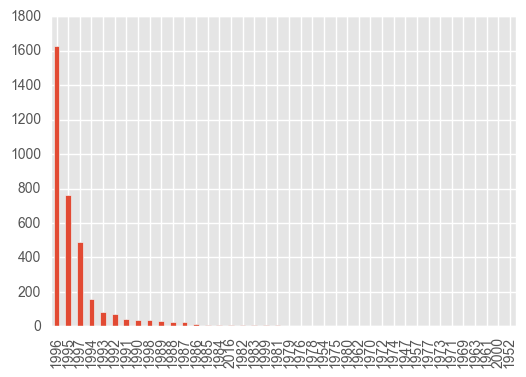

In [325]:
df.year.value_counts().plot(kind='bar')

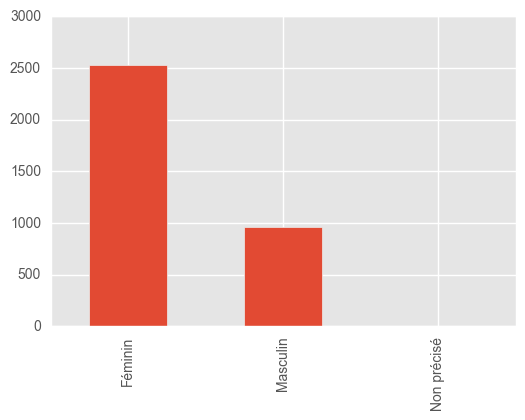

In [326]:
df.Sexe.value_counts().plot(kind='bar')

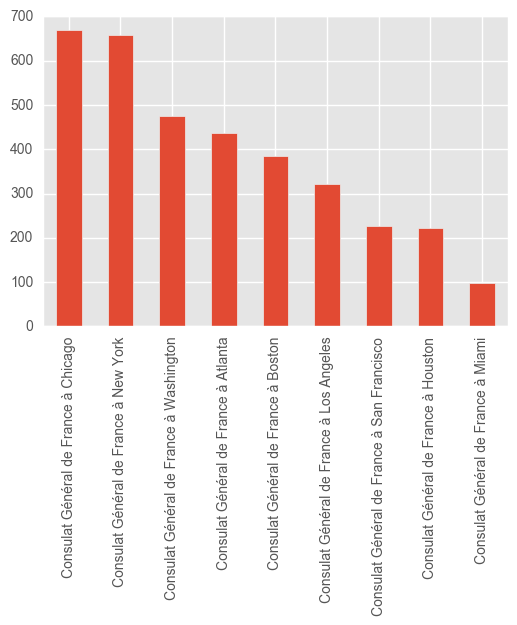

In [327]:
df['Assigned Consulat'].value_counts().plot(kind='bar')

In [306]:
df.columns

Index([                                                                       u'Sexe',
                                                                               u'DoB',
                                                                       u'Nationality',
       u'Type de dossier (accepted = pre consulaire, not accepted yet = candidature)',
                                                                      u'Study level ',
                                                                 u'Assigned Consulat',
            u'Individual mobilty = acceptation papier / mobility exchange =  echange',
                                                         u'Host University in France',
                                                                  u'Study level goal',
                                                                 u'2nd study Projet ',
                                                                   u'host intitution',
                                           

In [307]:
df['Host University in France'].value_counts()

Sciences Po - Site de Paris                                                                                                 130
IAU College                                                                                                                 126
NYU Paris                                                                                                                   103
Georgia Institute of Technology                                                                                              80
Institut catholique de Paris - Institut de Langue et de Culture Françaises - Site de Paris                                   73
American University of Paris - Site de Paris                                                                                 68
St. John's University                                                                                                        56
Université catholique de l'Ouest - Centre international d'études françaises (CIDEF) - Site de Angers    

In [308]:
df['Host University in France'].fillna('0', inplace=True)

In [309]:
df.ix[df['Host University in France'].str.contains("Paris"), 'City'] = "Paris"

In [310]:
df.ix[df['Host University in France'].str.contains("Marseille"), 'City'] = "Marseille"
df.ix[df['Host University in France'].str.contains("Lyon"), 'City'] = "Lyon"
df.ix[df['Host University in France'].str.contains("Toulouse"), 'City'] = "Toulouse"
df.ix[df['Host University in France'].str.contains("Nice"), 'City'] = "Nice"
df.ix[df['Host University in France'].str.contains("Nantes"), 'City'] = "Nantes"
df.ix[df['Host University in France'].str.contains("Strasbourg"), 'City'] = "Strasbourg"
df.ix[df['Host University in France'].str.contains("Montpellier"), 'City'] = "Montpellier"
df.ix[df['Host University in France'].str.contains("Bordeaux"), 'City'] = "Bordeaux"
df.ix[df['Host University in France'].str.contains("Lille"), 'City'] = "Lille"
df.ix[df['Host University in France'].str.contains("Rennes"), 'City'] = "Rennes"
df.ix[df['Host University in France'].str.contains("Reims"), 'City'] = "Reims"
df.ix[df['Host University in France'].str.contains("Le Havre"), 'City'] = "Le Havre"
df.ix[df['Host University in France'].str.contains("Toulon"), 'City'] = "Toulon"
df.ix[df['Host University in France'].str.contains("Grenoble"), 'City'] = "Grenoble"
df.ix[df['Host University in France'].str.contains("Dijon"), 'City'] = "Dijon"
df.ix[df['Host University in France'].str.contains("Angers"), 'City'] = "Angers"
df.ix[df['Host University in France'].str.contains("Villeurbanne"), 'City'] = "Villeurbanne"
df.ix[df['Host University in France'].str.contains("Aix-en-Provence"), 'City'] = "Aix-en-Provence"
df.ix[df['Host University in France'].str.contains("Le Mans"), 'City'] = "Le Mans"
df.ix[df['Host University in France'].str.contains("Brest"), 'City'] = "Brest"
df.ix[df['Host University in France'].str.contains("Boulogne"), 'City'] = "Boulogne"
df.ix[df['Host University in France'].str.contains("Nancy"), 'City'] = "Nancy"
df.ix[df['Host University in France'].str.contains("Calais"), 'City'] = "Calais"
df.ix[df['Host University in France'].str.contains("Cannes"), 'City'] = "Cannes"
df.ix[df['Host University in France'].str.contains("Montreuil"), 'City'] = "Montreuil"
df.ix[df['Host University in France'].str.contains("Avignon"), 'City'] = "Avignon"
df.ix[df['Host University in France'].str.contains("Drancy"), 'City'] = "Drancy"
df.ix[df['Host University in France'].str.contains("HEC"), 'City'] = "HEC"
df.ix[df['Host University in France'].str.contains("American Business School"), 'City'] = "Paris"


In [311]:
df.ix[df['Host University in France'].str.contains("Clermont"), 'City'] = "Clermont"
df.ix[df['Host University in France'].str.contains("Georgia"), 'City'] = "Metz"
df.ix[df['Host University in France'].str.contains("Pau"), 'City'] = "Pau"
df.ix[df['Host University in France'].str.contains("Sorbonne"), 'City'] = "Paris"
df.ix[df['Host University in France'].str.contains("Normandie"), 'City'] = "Normandie"
df.ix[df['Host University in France'].str.contains("Versailles"), 'City'] = "Versailles"
df.ix[df['Host University in France'].str.contains("Limoges"), 'City'] = "Limoges"
df.ix[df['Host University in France'].str.contains("Metz"), 'City'] = "Metz"
df.ix[df['Host University in France'].str.contains("SKEMA"), 'City'] = "Lille"
df.ix[df['Host University in France'].str.contains("St. John"), 'City'] = "Paris"
df.ix[df['Host University in France'].str.contains("Cergy-Pontoise"), 'City'] = "Cergy-Pontoise"
df.ix[df['Host University in France'].str.contains("Syracuse"), 'City'] = "Strasbourg"
df.ix[df['Host University in France'].str.contains("Aix-Marseille"), 'City'] = "Provence"
df.ix[df['Host University in France'].str.contains("Gif-sur-Yvette"), 'City'] = "Paris"
df.ix[df['Host University in France'].str.contains("ESSEC"), 'City'] = "Cergy-Pontoise"
df.ix[df['Host University in France'].str.contains("Rouen"), 'City'] = "Rouen" 
df.ix[df['Host University in France'].str.contains("emlyon"), 'City'] = "Lyon"
df.ix[df['Host University in France'].str.contains("Blaise Pascal"), 'City'] = "Clermont-Ferrand"
df.ix[df['Host University in France'].str.contains("Tours"), 'City'] = "Tours"
df.ix[df['Host University in France'].str.contains("IAU Provence"), 'City'] = "Aix-en-Provence"



In [312]:
df.ix[df['Host University in France'].str.contains("0"), 'City'] = "None"
df['City'].fillna('Multiple/Paris', inplace=True)
df.ix[df['Host University in France'].str.contains("Multiple/Paris"), 'Host University in France'] = "None"

In [313]:
df[df.City == 'Multiple/Paris']

,Sexe,DoB,Nationality,"Type de dossier (accepted = pre consulaire, not accepted yet = candidature)",Study level,Assigned Consulat,Individual mobilty = acceptation papier / mobility exchange = echange,Host University in France,Study level goal,2nd study Projet,...,registration payment date,positive avis SCAC,negative avis SCAC,electronic admission accepted,electronic admission denied,consulat reception file,file reception date by consulat,Visa accepted or denied,year,City
22,Féminin,1997-12-23,Etats-Unis,Pré-consulaire,NaN,Consulat Général de France à New York,Echange,Université de Franche-Comté - Centre de Lingui...,Bac +3,NaN,...,18/11/2016 19:46,1,0,NaN,NaN,oui,13/12/2016,oui,1997,Multiple/Paris
26,Masculin,1996-07-02,Chine,Pré-consulaire,NaN,Consulat Général de France à Chicago,Echange,Ecole Nationale Supérieure de l'Electronique e...,Bac -1 (première),NaN,...,02/12/2016 14:42,1,0,NaN,NaN,oui,06/12/2016,oui,1996,Multiple/Paris
34,Féminin,1996-04-01,Etats-Unis,Pré-consulaire,NaN,Consulat Général de France à Los Angeles,Echange,Institute for American Universities,Bac -1 (première),NaN,...,18/11/2016 23:07,1,0,NaN,NaN,oui,09/12/2016,oui,1996,Multiple/Paris
45,Masculin,1994-06-14,Etats-Unis,Pré-consulaire,NaN,Consulat Général de France à Houston,Echange,Ecole nationale supérieure du pétrole et des m...,MULTI NIVEAUX,NaN,...,14/11/2016 18:28,1,0,NaN,NaN,oui,13/12/2016,oui,1994,Multiple/Paris
60,Féminin,1996-04-25,Etats-Unis,Pré-consulaire,NaN,Consulat Général de France à New York,Echange,Grande École d'Ingénieurs Généraliste Électron...,Bac +2,NaN,...,08/11/2016 15:09,1,0,NaN,NaN,oui,14/12/2016,oui,1996,Multiple/Paris
61,Masculin,1990-12-06,Turquie,Pré-consulaire,NaN,Consulat Général de France à Houston,Echange,Ecole nationale supérieure du pétrole et des m...,MULTI NIVEAUX,NaN,...,14/11/2016 18:14,1,0,NaN,NaN,oui,02/12/2016,oui,1990,Multiple/Paris
71,Féminin,1993-08-04,Etats-Unis,Pré-consulaire,NaN,Consulat Général de France à New York,Echange,Université de Franche-Comté - Centre de Lingui...,Bac +3,NaN,...,23/11/2016 20:11,1,0,NaN,NaN,oui,27/12/2016,oui,1993,Multiple/Paris
113,Féminin,1996-03-16,Etats-Unis,Pré-consulaire,NaN,Consulat Général de France à New York,Echange,IAU College,Bac +3,NaN,...,09/12/2016 21:12,1,0,NaN,NaN,oui,30/12/2016,oui,1996,Multiple/Paris
165,Féminin,1995-09-14,Etats-Unis,Pré-consulaire,NaN,Consulat Général de France à Boston,Echange,IAU College,Bac -1 (première),NaN,...,18/11/2016 23:26,1,0,NaN,NaN,non,NaN,NaN,1995,Multiple/Paris
221,Masculin,1988-12-16,Etats-Unis,Pré-consulaire,NaN,Consulat Général de France à Chicago,Acceptation papier,Sciences Po,Bac + 5,NaN,...,16/09/2016 16:09,1,0,NaN,NaN,oui,21/10/2016,oui,1988,Multiple/Paris


In [315]:
df.City.value_counts()

Paris               1370
Multiple/Paris       594
Lyon                 160
Metz                 155
None                 129
Pau                  116
Lille                114
Grenoble             104
Strasbourg            87
Angers                80
Provence              61
Nantes                53
HEC                   48
Rennes                47
Bordeaux              42
Nice                  41
Marseille             34
Cergy-Pontoise        32
Toulouse              32
Cannes                29
Normandie             28
Dijon                 26
Tours                 24
Nancy                 19
Reims                 14
Aix-en-Provence       13
Montpellier           12
Versailles             7
Clermont               5
Clermont-Ferrand       5
Limoges                4
Le Mans                2
Rouen                  2
Villeurbanne           2
Boulogne               2
Name: City, dtype: int64

In [320]:
df.to_csv('out.csv', index=False, encoding='utf-8')

## Exchange program data

In [72]:
PE = pd.read_excel('PE_USA.xls', encoding='utf-8')

In [73]:
PE

,CEF,Programme d'échange,Région,Etab local,Groupement,Etablissement,Niveau,Domaine,Exempté d’entretien pré-consulaire,Mode saisie,Nombre étudiants
0,Espace Campus France USA,"USAC - Université Pau et Pays de l'Adour , UFR...",NaN,NaN,Université Pau et Pays de l'Adour,"UFR de lettres, langues et sciences humaines, ...",NaN,NaN,f,Normal,46
1,Espace Campus France USA,Northwestern University - / Sciences Po,Illinois,Northwestern University,NaN,Sciences Po,MULTI NIVEAUX,MULTI DOMAINES,t,Allegé,38
2,Espace Campus France USA,Duke University - Université Paris Diderot,North Carolina,Duke University,Université Paris Diderot,NaN,MULTI NIVEAUX,MULTI DOMAINES,t,Allegé,17
3,Espace Campus France USA,Insitute for the International Education of St...,NaN,NaN,Université de Nantes,NaN,NaN,NaN,f,Normal,17
4,Espace Campus France USA,University of California - Santa Barbara - Uni...,California (Los Angeles Consulate),University of California - Santa Barbara,Université de Bordeaux,NaN,MULTI NIVEAUX,MULTI DOMAINES,t,Allegé,17
5,Espace Campus France USA,University of Minnesota - Twin Cities - Univer...,Minnesota,University of Minnesota - Twin Cities,Université Paul Valéry Montpellier,NaN,MULTI NIVEAUX,MULTI DOMAINES,t,Allegé,16
6,Espace Campus France USA,"IES, Institute for the International Education...",Illinois,"IES, Institute for the International Education...",Université de Nantes,NaN,Bac +3,Langues et lettres,t,Allegé,15
7,Espace Campus France USA,Loyola University Maryland - / American Unive...,Maryland,Loyola University Maryland,NaN,American University of Paris,Bac +3,MULTI DOMAINES,t,Allegé,14
8,Espace Campus France USA,Georgetown University - Université de Strasbou...,"District Of Columbia, Washington",Georgetown University,Université de Strasbourg,Institut d'études politiques (Sciences Po Stra...,MULTI NIVEAUX,Sciences économiques et politiques,t,Allegé,12
9,Espace Campus France USA,Georgetown University - Université Lumière - L...,"District Of Columbia, Washington",Georgetown University,Université Lumière - Lyon 2,Institut d'études politiques (Sciences Po Lyon),MULTI NIVEAUX,Sciences économiques et politiques,t,Allegé,12


In [74]:
PE.Niveau.value_counts()

MULTI NIVEAUX    916
Bac +3            83
Bac +5            33
Bac +2            13
Bac +4             2
Bac +8             1
Name: Niveau, dtype: int64

In [75]:
PE.rename(columns=lambda x: x.replace(' ','_'), inplace=True)

In [77]:
PE.rename(columns=lambda x: x.replace(u'é','e'), inplace=True)

In [86]:
PE.groupby('Domaine').Nombre_etudiants.sum().sort_values(ascending=False)

Domaine
MULTI DOMAINES                                          343
Management, gestion, finances et commerce               133
Langues et lettres                                      116
Sciences économiques et politiques                       91
Sciences humaines et sociales                            14
Architecture, urbanisme et aménagement du territoire     13
Mathématiques                                            11
Droit                                                     3
Sciences de l'ingénieur                                   2
Arts, culture, design et mode                             1
Physique                                                  1
Communication et journalisme                              1
Environnement et sciences de la terre                     1
Biologie                                                  0
Chimie                                                    0
Transport et logistique                                   0
Informatique                    

In [324]:
PE.groupby('Etablissement').Nombre_etudiants.sum().sort_values(ascending=False)

Etablissement
Sciences Po                                                                                       89
UFR de lettres, langues et sciences humaines, sport                                               46
Kedge Business School                                                                             26
Centre international d'études françaises (CIDEF)                                                  16
Institut d'études politiques (Sciences Po Lyon)                                                   15
American University of Paris                                                                      14
Institut international d'études françaises                                                        14
Ecole supérieure du commerce extérieur                                                            13
ESCP EUROPE                                                                                       13
Institut d'études politiques (Sciences Po Strasbourg)                        

In [90]:
PE.groupby('Etab_local').Nombre_etudiants.sum().sort_values(ascending=False)

Etab_local
University of California - Santa Barbara                      47
Northwestern University                                       42
Middlebury College                                            42
Georgetown University                                         37
University of California - Los Angeles                        28
University of Minnesota - Twin Cities                         19
Duke University                                               17
IES, Institute for the International Education of Students    16
University of Washington                                      15
University of California - San Diego                          15
College of Charleston                                         14
Loyola University Maryland                                    14
University of Kansas                                          14
Smith College                                                 12
University of California - Irvine                             11
Nazareth Colle

In [322]:
PE.groupby('Region').Nombre_etudiants.sum().sort_values(ascending=False)

Region
California (Los Angeles Consulate)      128
Illinois                                 69
North Carolina                           57
New York                                 44
Vermont                                  42
District Of Columbia, Washington         40
Massachusetts                            37
Pennsylvania                             26
South Carolina                           24
Indiana                                  24
Maryland                                 22
Washington                               21
Minnesota                                20
Kansas                                   20
Texas                                    18
Georgia                                  16
Oregon                                   13
Florida                                  12
Oklahoma                                 11
Rhode Island                             10
Virginia                                 10
Wisconsin                                10
Connecticut              

In [100]:
PE['Etab_local'] = PE.Etab_local.fillna('0')

In [118]:
PE[PE['Etab_local'].str.contains('University of Texas')].Nombre_etudiants.sum()

1

In [121]:
PE[PE['Etab_local'].str.contains('SUNY')].Nombre_etudiants.sum()

14

In [124]:
PE[PE['Etab_local'].str.contains('New York')].Nombre_etudiants.sum()

6

In [114]:
PE[PE['Etab_local'].str.contains('University of California')].Nombre_etudiants.sum()

103

In [115]:
PE[PE['Etab_local'].str.contains('University of Washington')].Nombre_etudiants.sum()

15

In [125]:
PE[PE['Etab_local'].str.contains('University of Washington')].Nombre_etudiants.sum()

15

In [126]:
PE[PE['Etab_local'].str.contains('Northwestern')].Nombre_etudiants.sum()

42

In [127]:
PE[PE['Etab_local'].str.contains('Georgetown')].Nombre_etudiants.sum()

37

In [128]:
PE[PE['Etab_local'].str.contains('University of Minnesota')].Nombre_etudiants.sum()

20

In [130]:
PE[PE['Etab_local'].str.contains('North Carolina')].Nombre_etudiants.sum()

32

In [137]:
PE[PE['Etab_local'].str.contains('Georgia')].Nombre_etudiants.sum()

15

In [138]:
PE[PE['Etab_local'].str.contains('Florida')].Nombre_etudiants.sum()

10

In [146]:
PE[PE['Etab_local'].str.contains('Tech')].Nombre_etudiants.sum()

2

In [150]:
PE[PE['Etab_local'].str.contains('Texas')].Nombre_etudiants.sum()

7